## 36118: Applied Natural Language Processing (ANLP)

### AT2 Part B

### Group 27: HD Innovators

## Sentiment Analysis

Contents:

1. Load and explore the data
2. Data preparation
3. Split data
4. Sentiment Analysis Models

   A] Logistic Regression using sentiment labels based on polarity score.
   
   B] Logistic Regression using sentiment labels based on valence score.
5. Model Evaluation

In [1]:
# Import packages
# Python packages
import pandas as pd
import numpy as np
import warnings

# NLTK packages
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Vectorisation package 
from sklearn.feature_extraction.text import CountVectorizer

# Split data package
from sklearn.model_selection import train_test_split

# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Evaluation package
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Hyperparameters Tuning package
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# Data visualisation package
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Load and explore the data

In [3]:
# Import data.
df_lyrics = pd.read_csv('/Users/monalipatil/ANLP/AT2/data/data_filtered.csv')

In [4]:
# Check summary information.
df_lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11978 entries, 0 to 11977
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    11978 non-null  int64  
 1   artist_name   11978 non-null  object 
 2   track_name    11978 non-null  object 
 3   release_date  11978 non-null  int64  
 4   genre         11978 non-null  object 
 5   lyrics        11978 non-null  object 
 6   len           11978 non-null  int64  
 7   valence       11978 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 748.8+ KB


In [5]:
# Describe summary statistics.
df_lyrics.describe()

,Unnamed: 0,release_date,len,valence
count,11978.000000,11978.000000,11978.000000,11978.000000
mean,16153.030473,1994.581232,106.949324,0.568380
std,7169.281975,17.132621,37.214055,0.245457
min,5.000000,1950.000000,56.000000,0.000000
25%,10682.500000,1982.000000,76.000000,0.375515
50%,17074.000000,1996.000000,98.000000,0.586768
75%,22211.750000,2010.000000,130.000000,0.767879
max,27467.000000,2019.000000,199.000000,1.000000


In [6]:
# Describe summary statistics for all datatype.
df_lyrics.describe(include='all')

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,valence
count,11978.000000,11978,11978,11978.000000,11978,11978,11978.000000,11978.000000
unique,NaN,3622,10981,NaN,6,11978,NaN,NaN
top,NaN,ella fitzgerald,fever,NaN,blues,cold chamber smoke kush gettin higher plane sw...,NaN,NaN
freq,NaN,49,11,NaN,2000,1,NaN,NaN
mean,16153.030473,NaN,NaN,1994.581232,NaN,NaN,106.949324,0.568380
std,7169.281975,NaN,NaN,17.132621,NaN,NaN,37.214055,0.245457
min,5.000000,NaN,NaN,1950.000000,NaN,NaN,56.000000,0.000000
25%,10682.500000,NaN,NaN,1982.000000,NaN,NaN,76.000000,0.375515
50%,17074.000000,NaN,NaN,1996.000000,NaN,NaN,98.000000,0.586768
75%,22211.750000,NaN,NaN,2010.000000,NaN,NaN,130.000000,0.767879


In [7]:
# Check columns.
df_lyrics.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'valence'],
      dtype='object')

In [8]:
# Check if any missing values.
for column in df_lyrics.columns:
    print(column, df_lyrics[column].isnull().sum())

Unnamed: 0 0
artist_name 0
track_name 0
release_date 0
genre 0
lyrics 0
len 0
valence 0


In [9]:
# Check first few rows. 
df_lyrics.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,valence
0,13923,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791
1,14958,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930
2,15045,the robert cray band,1040 blues,1993,blues,gotta rapper today forget fuck smokin brain ce...,198,0.613561
3,15691,carl sims,it's just a party,2004,blues,girls knock ghetto ballin real thugs unngghhhh...,198,0.705276
4,16322,rufus thomas,sixty minute man,2011,blues,diddle devil yabba double walk feel body feel ...,198,0.651690


In [10]:
# Remove 'Unnamed: 0' column. 
df_lyrics.drop(['Unnamed: 0'], axis=1, inplace=True) 

### 2. Data preparation

Tokenise & Remove Punctuations

In [11]:
# Convert all data of lyrics to string type.
df_lyrics['lyrics'] = df_lyrics['lyrics'].apply(str)

# Convert all string of lyrics to lowercase.
df_lyrics['lyrics'] = df_lyrics['lyrics'].str.lower()

# Tokenize text from lyrics. 
df_lyrics['tokenized'] = df_lyrics['lyrics'].apply(word_tokenize)

# Remove punctuations.
punc_marks = list(string.punctuation)
df_lyrics['tokenized'] = df_lyrics['tokenized'].apply(lambda x: [word for word in x if word not in punc_marks])
                                                                       
# Display smaple data. 
df_lyrics.sample(5)

,artist_name,track_name,release_date,genre,lyrics,len,valence,tokenized
8917,xavier rudd,better people,2007,reggae,people save whale give thank seas respect ones...,110,0.500206,"[people, save, whale, give, thank, seas, respe..."
10061,rage against the machine,how i could just kill a man,2000,rock,miss pass miss hootah funky buddha eluder fuck...,166,0.624897,"[miss, pass, miss, hootah, funky, buddha, elud..."
10724,elvis presley,such a night,1960,rock,night oooo night night moon bright bright nigh...,95,0.912407,"[night, oooo, night, night, moon, bright, brig..."
4237,the ink spots,he'll have to go,1981,jazz,gwan test gwan bring true live ness forward vi...,167,0.339448,"[gwan, test, gwan, bring, true, live, ness, fo..."
2060,trace adkins,honky tonk badonkadonk,2005,country,turn alright boys favorite song know right pla...,176,0.823784,"[turn, alright, boys, favorite, song, know, ri..."


Remove Stopwords

In [12]:
# Use stopwords to remove stop words.
stopwords = nltk.corpus.stopwords.words('english')

# Add personalised list of stop words.
stopwords.extend(["'m", "'s", "'d", "hi", "im", "wa", "n't", "'get", "'ll", "'re", "'ve", "get", "still", "mmm", "ooh", "oooh", "yah", "yeh","mmm", "hmm"])

# Remove the stop words from the dataset. 
df_lyrics['cleaned_stopwords'] = df_lyrics['tokenized'].apply(lambda x: [word for word in x if word not in stopwords])

# Check first few rows. 
df_lyrics.head(3)

,artist_name,track_name,release_date,genre,lyrics,len,valence,tokenized,cleaned_stopwords
0,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791,"[cold, chamber, smoke, kush, gettin, higher, p...","[cold, chamber, smoke, kush, gettin, higher, p..."
1,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930,"[public, service, announcement, weezy, baby, b...","[public, service, announcement, weezy, baby, b..."
2,the robert cray band,1040 blues,1993,blues,gotta rapper today forget fuck smokin brain ce...,198,0.613561,"[got, ta, rapper, today, forget, fuck, smokin,...","[got, ta, rapper, today, forget, fuck, smokin,..."


Lemmatization

In [13]:
# Function to attain part of speech of words.
def determine_wordnet_speech(word_tag):
    if word_tag.startswith('J'):
        return wordnet.ADJ
    elif word_tag.startswith('V'):
        return wordnet.VERB
    elif word_tag.startswith('N'):
        return wordnet.NOUN
    elif word_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
# Add part of speech tags.
df_lyrics['pos_tags'] = df_lyrics['cleaned_stopwords'].apply(nltk.tag.pos_tag)

# Function to get part of speech in WordNet format.
df_lyrics['pos_tags'] = df_lyrics['pos_tags'].apply(lambda x: [(word, determine_wordnet_speech(pos_tag)) for (word, pos_tag) in x])

# Lemmatize words.
word_lemmatizer = WordNetLemmatizer()
df_lyrics['lyrics_lemmatized'] = df_lyrics['pos_tags'].apply(lambda x: [word_lemmatizer.lemmatize(word, tag) for word, tag in x])

# Convert list to string datatype. 
df_lyrics['lyrics_lemmatized'] = [' '.join(map(str,l)) for l in df_lyrics['lyrics_lemmatized']]

# Check few rows.
df_lyrics.head(3)

,artist_name,track_name,release_date,genre,lyrics,len,valence,tokenized,cleaned_stopwords,pos_tags,lyrics_lemmatized
0,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791,"[cold, chamber, smoke, kush, gettin, higher, p...","[cold, chamber, smoke, kush, gettin, higher, p...","[(cold, a), (chamber, n), (smoke, v), (kush, n...",cold chamber smoke kush gettin high plane swan...
1,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930,"[public, service, announcement, weezy, baby, b...","[public, service, announcement, weezy, baby, b...","[(public, a), (service, n), (announcement, n),...",public service announcement weezy baby best ra...
2,the robert cray band,1040 blues,1993,blues,gotta rapper today forget fuck smokin brain ce...,198,0.613561,"[got, ta, rapper, today, forget, fuck, smokin,...","[got, ta, rapper, today, forget, fuck, smokin,...","[(got, v), (ta, a), (rapper, n), (today, n), (...",get ta rapper today forget fuck smokin brain c...


In [14]:
# Define function to classify lyrics to sentiment labels based on polarity.
def polarity_sentiment_analysis(word):
    if word < 0:
        return 'negative'
    elif word == 0:
        return 'neutral'
    else:
        return 'positive'

In [15]:
# Define function to classify lyrics to sentiment labels based on valence.
def valence_sentiment_analysis(valence):
    if valence < 0.45:
        return 'negative'
    elif valence > 0.55:
        return 'positive'
    else:
        return 'neutral'

Feature Engineering

In [16]:
# Check popular sentiments of lyrics.
df_lyrics['polarity_score'] = df_lyrics['lyrics_lemmatized'].apply(lambda x : TextBlob(x).sentiment.polarity)

# 1.Classify the polarity sentiment labels for lyrics.
df_lyrics['polarity_sentiments_labels']= df_lyrics['polarity_score'].map(lambda word: polarity_sentiment_analysis(word))

# 2.Classify the valence sentiment labels for lyrics.
df_lyrics['valence_sentiments_labels'] = df_lyrics['valence'].apply(valence_sentiment_analysis)

# 3.Classify the sentiment score for lyrics based on sentiment.subjectivity.
df_lyrics['sentiments_score']= df_lyrics['lyrics_lemmatized'].map(lambda x: TextBlob(x).sentiment.subjectivity)

# Check the few rows
df_lyrics.head(3)

,artist_name,track_name,release_date,genre,lyrics,len,valence,tokenized,cleaned_stopwords,pos_tags,lyrics_lemmatized,polarity_score,polarity_sentiments_labels,valence_sentiments_labels,sentiments_score
0,santana,wham!,1978,blues,cold chamber smoke kush gettin higher plane sw...,198,0.857791,"[cold, chamber, smoke, kush, gettin, higher, p...","[cold, chamber, smoke, kush, gettin, higher, p...","[(cold, a), (chamber, n), (smoke, v), (kush, n...",cold chamber smoke kush gettin high plane swan...,0.132139,positive,positive,0.649412
1,marvin sease,show me what you got,1991,blues,public service announcement weezy baby best ra...,198,0.794930,"[public, service, announcement, weezy, baby, b...","[public, service, announcement, weezy, baby, b...","[(public, a), (service, n), (announcement, n),...",public service announcement weezy baby best ra...,0.185142,positive,positive,0.593548
2,the robert cray band,1040 blues,1993,blues,gotta rapper today forget fuck smokin brain ce...,198,0.613561,"[got, ta, rapper, today, forget, fuck, smokin,...","[got, ta, rapper, today, forget, fuck, smokin,...","[(got, v), (ta, a), (rapper, n), (today, n), (...",get ta rapper today forget fuck smokin brain c...,-0.191667,negative,positive,0.466667


### A] Sentiment Analysis using sentiment labels based on polarity

### 3. Split the data

Vectorisation text representation

In [17]:
# Transform lyrics text using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_lyrics['lyrics_lemmatized'])

In [18]:
# Split data into training and testing sets
y = df_lyrics['polarity_sentiments_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

Modelling

In [19]:
# Train a Logistic Regression model
lr_model1 = LogisticRegression()
lr_model1.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Predict on training set
y_train_pred = lr_model1.predict(X_train)

In [21]:
# Calculate performance of the model on the training set
print('Accuracy:', accuracy_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred, average='weighted'))
print('Recall:', recall_score(y_train, y_train_pred, average='weighted'))
print('F1 Score:', f1_score(y_train, y_train_pred, average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


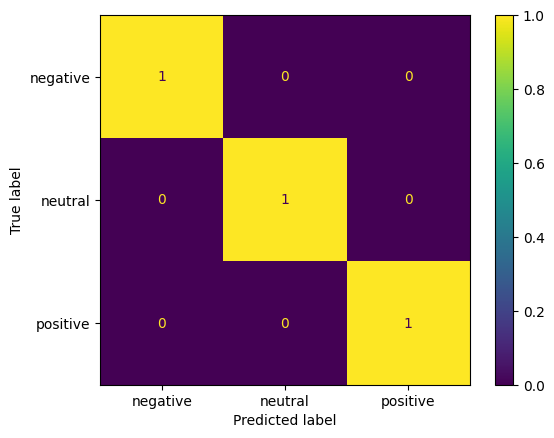

In [22]:
# Visualise confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize = 'true')

### 5. Model Evaluation

In [23]:
# Predict on testing set
y_test_pred = lr_model1.predict(X_test)

In [24]:
# Calculate performance of the model on the testing set
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_test_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_test_pred, average='weighted'))

Accuracy: 0.8747913188647746
Precision: 0.8693484272939161
Recall: 0.8747913188647746
F1 Score: 0.8715660662217265


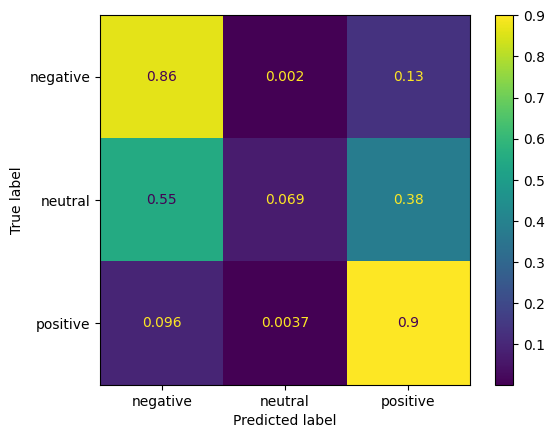

In [25]:
# Visualise confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize = 'true')

Tuning Hyperparameters

In [26]:
# Define the hyperparameter search grid for RandomizedSearchCV
param_grid = {'C': uniform(loc=0, scale=10),
             'penalty': ['l1', 'l2'],
             'solver': ['liblinear', 'saga']}

In [27]:
# Build a logistic regression model
lr_model2 = LogisticRegression(random_state=9)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(lr_model2, param_distributions=param_grid, cv=5, n_iter=10, scoring='accuracy', random_state=9)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=9),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x14e2d7df0>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=9, scoring='accuracy')

In [28]:
# Print the best hyperparameters and cross-validation score
print('Best Hyperparameters: ', random_search.best_params_)
print('Best Score: ', random_search.best_score_)

Best Hyperparameters:  {'C': 1.4211108545453854, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score:  0.901169570582079


### 5. Model Evaluation

In [29]:
# Evaluate the model performance on the testing set
y_test_pred = random_search.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_test_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_test_pred, average='weighted'))

Accuracy: 0.912771285475793
Precision: 0.9056370558489497
Recall: 0.912771285475793
F1 Score: 0.9087807132526539


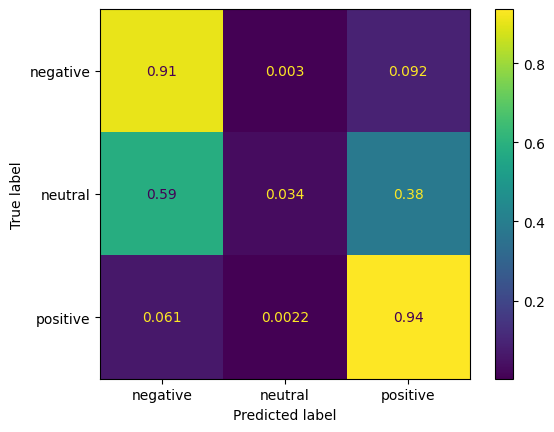

In [30]:
# Visualise confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize = 'true')

### B] Sentiment Analysis using sentiment labels based on valence

### 3. Split the data

Vectorisation text representation

In [31]:
# Transform lyrics text using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_lyrics['lyrics_lemmatized'])

In [32]:
# Split data into training and testing sets
y = df_lyrics['valence_sentiments_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

### 4. Modelling

Tuning Hyperparameters

In [33]:
# Define the hyperparameter search grid for RandomizedSearchCV
param_grid = {'C': uniform(loc=0, scale=10),
             'penalty': ['l1', 'l2'],
             'solver': ['liblinear', 'saga']}

In [34]:
# Build a logistic regression model
lr_model3 = LogisticRegression(random_state=9)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(lr_model3, param_distributions=param_grid, cv=5, n_iter=10, scoring='accuracy', random_state=9)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=9),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x14e2d58d0>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=9, scoring='accuracy')

In [35]:
# Print the best hyperparameters and cross-validation score
print('Best Hyperparameters: ', random_search.best_params_)
print('Best Score: ', random_search.best_score_)

Best Hyperparameters:  {'C': 0.10374153885699955, 'penalty': 'l1', 'solver': 'saga'}
Best Score:  0.5547884383545532


### 5. Model Evaluation

In [36]:
# Evaluate the model performance on the testing set
y_test_pred = random_search.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_test_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_test_pred, average='weighted'))

Accuracy: 0.5571786310517529
Precision: 0.4927641635779553
Recall: 0.5571786310517529
F1 Score: 0.5086388941104893


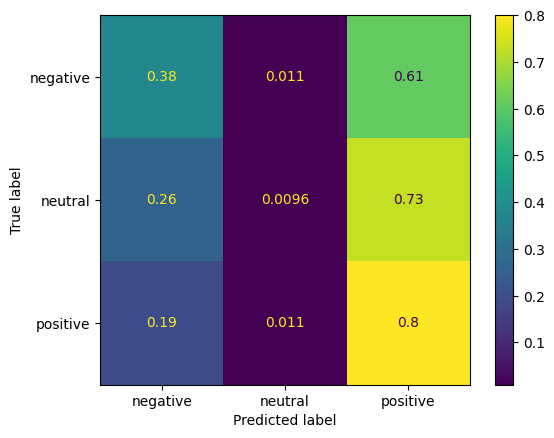

In [37]:
# Visualise confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize = 'true')